In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.matlib as mat

In [85]:
df = pd.read_excel('nation_level_daily.xlsx')


In [86]:
X = pd.DataFrame(np.ones((250,1)))
X['days']= (df.iloc[:,0])

In [100]:
X['days2'] = X['days']**2   #x^2
X['days4'] = X['days']**4   #x^4
X['days2'] = (X['days2'] )/ np.mean(X['days2']) #normalize 
X['days3'] = X['days']**3   #x^3
X['days3'] = (X['days3'] )/ np.mean(X['days3'])
X['days4'] = (X['days4'])/np.mean(X['days4']) 
X
X_train = X[45:137]
X_test = X[137:]



In [102]:
y = pd.DataFrame(df.iloc[45:137,3])


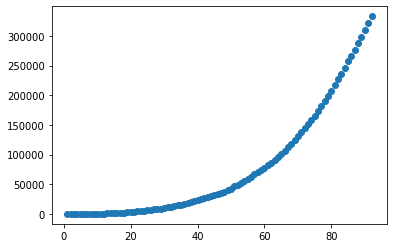

In [103]:
plt.scatter(X_train['days'],y)

In [90]:
#initialize
theta = np.zeros((5,1))

In [91]:
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

# Normal Equation

In [106]:

inver = np.linalg.inv(np.dot(X_train.T,X_train))
theta_n = np.dot(np.dot(inver,X_train.T),y)          



# Prediction

In [107]:


h = np.dot(X_train,theta_n)
h_test = np.dot(X_test,theta_n)
for i in range(0,32):
    if h[i] < 0:
        h[i] = 0
    



In [42]:
from sklearn import metrics

In [135]:

(h-y).astype(int)
Accuracy = 100 - np.sum((h-y) / y)*100
print("Training Accuracy : {} %".format(Accuracy[0]))

Training Accuracy : 91.80808161623554 %


In [98]:
metrics.r2_score(h,y)

0.9999138128633935

# Plot Predicted Graph

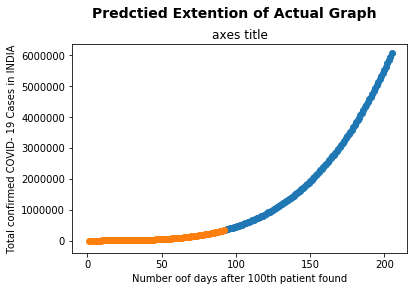

In [132]:
fig = plt.figure()
fig.suptitle('Predctied Extention of Actual Graph', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('axes title')
ax.set_xlabel('Number oof days after 100th patient found')
ax.set_ylabel('Total confirmed COVID- 19 Cases in INDIA')


ax.scatter(X_test['days'],h_test)
ax.scatter(X_train['days'],h)



plt.show()